# Contents

1. [Imports](#1.-Imports)
2. [Data Exploration](#2.-Data-Exploration)
3. [Incoherences check](#3.-Incoherences-check)
4. [Missing Values](#4.-Missing-Values)
5. [Feature Engineering](#5.-Feature-Engineering)
6. [Mapping and Encoding](#6.-Mapping-and-Encoding)
7. [Scaling Data](#7.-Scaling-Data)
8. [Modeling](#8.-Modeling)

## 1. Imports

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Data Exploration

In [3]:
df_train = pd.read_csv('train.csv',
                 sep=',',
               index_col = ['encounter_id'],
                 na_values=['?']
                )

In [4]:
df_test = pd.read_csv('test.csv',
                 sep=',',
                 index_col = ['encounter_id'],
                 na_values=['?']
                )

In [5]:
train = df_train.copy()
test = df_test.copy()

In [6]:
train.shape

(71236, 30)

In [7]:
test.shape

(30530, 28)

In [8]:
train.head(50).T

encounter_id,533253,426224,634063,890610,654194,269878,182051,964239,418598,760130,...,488420,315879,101519,224701,471683,469306,201542,806395,942220,810223
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
patient_id,70110,29775006,80729253,2919042,84871971,279288,1566405,60052095,85756257,96104214,...,40852710,1385559,73247976,84376332,86280993,89413974,98584524,3360294,98754759,2486844
race,Caucasian,AfricanAmerican,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Other,Caucasian,Caucasian,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Other,AfricanAmerican,Caucasian,AfricanAmerican
gender,Female,Male,Female,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female
age,[70-80),[50-60),[60-70),[60-70),[70-80),[50-60),[50-60),[70-80),[50-60),[70-80),...,[70-80),[60-70),[40-50),[70-80),[70-80),[60-70),[50-60),[30-40),[30-40),[30-40)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,NaN,NaN,NaN,MC,HM,NaN,UN,MC,MC,MC,...,MC,NaN,MD,MC,MC,SP,SP,NaN,UN,NaN
outpatient_visits_in_previous_year,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
emergency_visits_in_previous_year,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
inpatient_visits_in_previous_year,2,0,1,1,0,0,0,0,0,0,...,4,0,5,1,3,0,3,0,3,7


In [9]:
test.head(50)

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
319065,USA,53751546,AfricanAmerican,Female,[30-40),NaN,NaN,0,0,0,...,8,780,403,V45,8,NaN,NaN,No,No,[]
403099,USA,104092839,AfricanAmerican,Male,[50-60),NaN,HM,0,0,0,...,18,577,305,276,9,NaN,>8,Ch,Yes,['insulin']
834256,USA,6219702,Caucasian,Female,NaN,NaN,NaN,0,0,0,...,21,611,683,296,5,NaN,>8,Ch,Yes,"['glipizide', 'insulin']"
804322,USA,25918992,Caucasian,Female,[50-60),NaN,NaN,0,0,0,...,20,197,415,558,8,NaN,>7,No,Yes,['metformin']


In [10]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_di

In [11]:
test.isna().sum()

country                                      0
patient_id                                   0
race                                      2191
gender                                       0
age                                       1531
weight                                   29579
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1585
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                     1101
admission_source                          2063
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            5
secondary_diagnosis                         96
additional_di

### Numerical Features

In [12]:
train["patient_id"]

encounter_id
533253       70110
426224    29775006
634063    80729253
890610     2919042
654194    84871971
            ...   
660160    24531381
826429     4663818
332030    23397147
757560    52161750
459757    88410897
Name: patient_id, Length: 71236, dtype: int64

In [13]:
repeated_values = train['patient_id'].value_counts()
repeated_values = repeated_values[repeated_values > 1]
print(repeated_values)

88785891     33
1660293      19
84428613     18
37096866     17
23199021     15
             ..
105797601     2
3446118       2
105263262     2
109114137     2
59142753      2
Name: patient_id, Length: 10559, dtype: int64


In [14]:
train[(train['discharge_disposition']=="Hospice / home") & (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
369573,USA,93854601,Caucasian,Male,[80-90),[50-75),CM,0,0,0,...,784,E934,9,NaN,NaN,No,No,[],Yes,<30 days
317759,USA,8767800,Caucasian,Male,[70-80),NaN,NaN,0,0,0,...,428,426,7,NaN,NaN,No,Yes,['glyburide'],Yes,<30 days
969527,USA,12811878,Caucasian,Female,[80-90),NaN,NaN,12,2,6,...,518,585,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days
244648,USA,95075865,Caucasian,Male,[60-70),NaN,MD,3,4,0,...,599,198,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days
936958,USA,23717187,AfricanAmerican,Female,[90-100),NaN,MC,0,1,2,...,425,V66,6,NaN,NaN,No,Yes,['metformin'],Yes,<30 days
516866,USA,34301979,Caucasian,Male,[70-80),NaN,MC,0,1,1,...,707,263,9,NaN,NaN,No,No,[],Yes,<30 days
252583,USA,95060412,Caucasian,Female,[80-90),NaN,MC,0,0,0,...,789,332,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days
660381,USA,66776904,Caucasian,Female,[70-80),NaN,NaN,0,0,3,...,428,403,9,NaN,NaN,No,Yes,['glyburide'],Yes,<30 days
679728,USA,111138912,AfricanAmerican,Male,[60-70),NaN,NaN,0,0,1,...,157,199,8,NaN,NaN,Ch,Yes,"['pioglitazone', 'insulin']",Yes,<30 days


In [15]:
train[train["readmitted_binary"]=="Yes"]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
345921,USA,63536886,Caucasian,Male,[80-90),NaN,NaN,0,0,0,...,403,428,7,NaN,NaN,Ch,Yes,"['glipizide', 'insulin']",Yes,<30 days
873304,USA,23492133,AfricanAmerican,Female,[60-70),NaN,NaN,0,0,0,...,403,496,8,NaN,NaN,No,No,[],Yes,<30 days
102821,USA,30520872,Caucasian,Female,[60-70),NaN,MC,0,0,1,...,682,428,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days
844139,USA,24854895,Caucasian,Male,NaN,NaN,NaN,0,0,1,...,491,682,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
825255,USA,3509442,Caucasian,Male,[50-60),NaN,NaN,0,0,1,...,996,433,9,NaN,NaN,No,No,[],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259379,USA,29662614,Caucasian,Female,[60-70),NaN,MC,4,0,0,...,518,569,9,NaN,NaN,Ch,Yes,"['metformin', 'pioglitazone', 'insulin']",Yes,<30 days
631066,USA,24858882,Caucasian,Male,[70-80),NaN,MC,0,0,0,...,276,536,9,NaN,NaN,Ch,Yes,"['metformin', 'insulin']",Yes,<30 days
397846,USA,57184236,Caucasian,Female,[80-90),NaN,MC,0,0,2,...,434,250.02,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days


In [16]:
train[(train['glucose_test_result']==">300")& (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
844139,USA,24854895,Caucasian,Male,NaN,NaN,NaN,0,0,1,...,491,682,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
844722,USA,23619924,Caucasian,Female,[70-80),NaN,NaN,0,0,0,...,401,250,4,>300,NaN,Ch,Yes,"['metformin', 'pioglitazone', 'insulin']",Yes,<30 days
335808,USA,23661198,Caucasian,Male,[50-60),NaN,MC,1,0,0,...,428,424,9,>300,NaN,Ch,Yes,"['metformin', 'glipizide', 'rosiglitazone', 'i...",Yes,<30 days
283073,USA,25841151,AfricanAmerican,Male,[40-50),NaN,NaN,1,0,0,...,250.03,401,6,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
333098,USA,24209856,Caucasian,Female,NaN,NaN,MD,0,1,3,...,70,303,8,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578889,USA,25869789,Caucasian,Male,NaN,NaN,NaN,1,2,0,...,491,276,7,>300,NaN,Ch,Yes,"['glipizide', 'insulin']",Yes,<30 days
864300,USA,23643405,Caucasian,Female,[20-30),NaN,HM,0,4,13,...,250.41,578,7,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
846465,USA,24269553,Caucasian,Male,NaN,NaN,NaN,1,3,1,...,250.01,278,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [17]:
train[(train['glucose_test_result']=="Norm")& (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
891370,USA,23382351,Caucasian,Female,[80-90),NaN,MC,2,0,0,...,401,250,4,Norm,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
754155,USA,54026280,Hispanic,Female,[60-70),NaN,NaN,0,0,0,...,562,535,6,Norm,NaN,No,No,[],Yes,<30 days
925506,USA,95930262,Caucasian,Female,[70-80),NaN,NaN,0,0,1,...,780,780,6,Norm,NaN,No,Yes,['glyburide'],Yes,<30 days
593152,USA,23512842,Caucasian,Female,[80-90),NaN,NaN,0,0,2,...,428,496,9,Norm,NaN,Ch,Yes,['insulin'],Yes,<30 days
732548,USA,99421578,Caucasian,Female,[90-100),NaN,HM,1,1,0,...,578,427,9,Norm,NaN,No,No,[],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802711,USA,4778442,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,0,...,250,401,3,Norm,NaN,No,Yes,['insulin'],Yes,<30 days
289939,USA,23393988,Caucasian,Male,[70-80),NaN,NaN,3,0,1,...,511,496,8,Norm,NaN,No,Yes,['glipizide'],Yes,<30 days
819403,USA,23378175,Caucasian,Female,[50-60),NaN,NaN,0,0,0,...,276,465,8,Norm,NaN,No,Yes,['metformin'],Yes,<30 days


In [18]:
# fazer feature dos pacientes q repetem mais dq 1 vez no hospital
# transformar as features de glucose test e de a1c test > 200 e > 300 para 1 e Norm para 0
# criar feature se tem peso ou n

## 3. Incoherences check

In [19]:
# Newborns with incorrect ages

age_to_exclude = ['[70-80)', '[50-60)', '[60-70)', '[80-90)', '[40-50)', '[20-30)', '[30-40)', '[90-100)', '[10-20)']

train = train.drop(train[(train["admission_type"] == "Newborn") & (train["age"].isin(age_to_exclude))].index)

In [20]:
# We will group the discharge_disposition later, so we decided to drop discharge_disposition with Expired

discharge_to_exclude = [
    'Expired',
    'Expired at home. Medicaid only, hospice.',
    'Expired in a medical facility. Medicaid only, hospice.'
]

train = train[~train['discharge_disposition'].isin(discharge_to_exclude)]

In [21]:
# Drop the gender with "Unknown/Invalid"

train = train[train['gender'] != "Unknown/Invalid"]

In [22]:
# Drop the Sick Baby and Extramural Birth with incorrect age

train = train[train['admission_source']!=" Sick Baby"]
train = train[train['admission_source']!=' Extramural Birth']

In [23]:
train.shape[0]/71236

0.9838284013700938

# Outliers

In [24]:
numerical_features = ['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']
categorical_features = train.columns.drop(numerical_features).to_list()

In [25]:
train[numerical_features].kurt() # a distribuição normal pela kurtose é evbidenciada quando a mesma é 3
# pelo que só vamos tomar atenção a valores superiores a 3 (n vemos o "number_od_medications" pq é mt proximo de 3 e é quase uma distribuição normal)

outpatient_visits_in_previous_year     154.037224
emergency_visits_in_previous_year     1210.468503
inpatient_visits_in_previous_year       20.386848
average_pulse_bpm                       -1.189798
length_of_stay_in_hospital               0.862472
number_lab_tests                        -0.264841
non_lab_procedures                       0.887171
number_of_medications                    3.512509
number_diagnoses                        -0.097114
dtype: float64

In [26]:
train[(train["outpatient_visits_in_previous_year"]>22) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 23

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
472104,USA,1978605,Caucasian,Female,[50-60),NaN,NaN,23,0,2,...,997,250.02,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [27]:
train[(train["inpatient_visits_in_previous_year"]>20) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 21

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
357915,USA,4790016,Caucasian,Female,[20-30),[50-75),MC,0,1,21,...,577,309,7,NaN,NaN,No,Yes,['insulin'],Yes,<30 days


In [28]:
train[(train["emergency_visits_in_previous_year"]>27) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 28

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
641150,USA,5539599,Caucasian,Male,[50-60),NaN,NaN,2,28,5,...,682,844,6,NaN,>7,No,No,[],Yes,<30 days


In [29]:
train[(train["number_of_medications"]>69) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 70

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
128311,USA,25162767,AfricanAmerican,Female,[50-60),NaN,SP,0,0,0,...,584,427,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [30]:
# Alteração ao dataset ( remover outliers )

# Basicamente aqui aplicamos o método windsorizing manualmente, dps das análises gráficas ( explicar o que faz este método no report )

# aplicamos manuamente ºpq neste projeto a dificuldade é descobrir quem volta e aplicando os thresholds escolhidos conseguimos treinar melhor o modelo para esse aspeto

train.loc[train["outpatient_visits_in_previous_year"]>23, "outpatient_visits_in_previous_year"] = 24

train.loc[train["inpatient_visits_in_previous_year"]>21, "inpatient_visits_in_previous_year"] = 22

train.loc[train["emergency_visits_in_previous_year"]>28, "emergency_visits_in_previous_year"] = 29

## 4. Missing Values

In [31]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      4989
gender                                       0
age                                       3506
weight                                   67869
payer_code                               27750
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3659
medical_specialty                        34339
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4630
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_di

In [32]:
# We will keep "race" and fill the missing values with mode

train["race"].value_counts()

Caucasian          49862
AfricanAmerican    12483
Hispanic            1351
Other                983
Asian                416
Name: race, dtype: int64

In [33]:
# We will keep "age" and fill the missing values with mode

train["age"].value_counts()

[70-80)     17016
[60-70)     14704
[50-60)     11321
[80-90)     11183
[40-50)      6382
[30-40)      2529
[90-100)     1799
[20-30)      1067
[10-20)       473
[0-10)        104
Name: age, dtype: int64

In [34]:
# We will drop "weight" but we are doing a binary feature as missing values or not

In [35]:
# https://www.mass.gov/doc/hsn-payer-code-list20130118pdf/download
# Payer_Code -> Code of the health insurance provider (if there is one)
# So this Nan values we need to input with SP = Self Payed

train["payer_code"].value_counts()

MC    22202
HM     4279
SP     3503
BC     3270
MD     2453
CP     1732
UN     1713
CM     1326
OG      721
PO      400
DM      375
CH      101
WC       99
OT       60
MP       54
SI       45
FR        1
Name: payer_code, dtype: int64

In [36]:
# We will keep "admission_type" and fill the missing values with mode

train["admission_type"].value_counts()

Emergency        36973
Elective         13115
Urgent           12848
Not Available     3262
Not Mapped         214
Trauma Center       12
Newborn              1
Name: admission_type, dtype: int64

In [37]:
# We will keep "medical_specialty" and fill the missing values with "Other"

train["medical_specialty"].value_counts()

InternalMedicine                 10090
Emergency/Trauma                  5237
Family/GeneralPractice            5122
Cardiology                        3675
Surgery-General                   2120
                                 ...  
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Pediatrics-EmergencyMedicine         1
Neurophysiology                      1
Name: medical_specialty, Length: 68, dtype: int64

In [38]:
# We will keep "discharge_disposition" and fill the missing values with mode

train["discharge_disposition"].value_counts()

Discharged to home                                                                                           42249
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9003
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                                                     679
Discharged/transferred to ICF                                                                                  571
Left AMA                                                                        

In [39]:
# We will keep "admission_source" and fill the missing values with mode

train["admission_source"].value_counts()

 Emergency Room                                               39534
 Physician Referral                                           20505
Transfer from a hospital                                       2188
 Transfer from another health care facility                    1545
Clinic Referral                                                 767
 Transfer from a Skilled Nursing Facility (SNF)                 566
HMO Referral                                                    127
 Not Mapped                                                     106
 Not Available                                                   88
 Court/Law Enforcement                                           10
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                                   1
Name: admission_source, dtype: int64

In [40]:
# We will keep "primary_diagnosis" and fill the missing values with mode

train["primary_diagnosis"].value_counts()

428    4683
414    4573
786    2846
410    2418
486    2416
       ... 
147       1
422       1
219       1
875       1
299       1
Name: primary_diagnosis, Length: 684, dtype: int64

In [41]:
# We will keep "secondary_diagnosis" and fill the missing values with "primary_diagnosis" mode to keep consistency

train["secondary_diagnosis"].value_counts()

276     4622
428     4596
250     4247
427     3458
401     2617
        ... 
916        1
833        1
E868       1
944        1
E968       1
Name: secondary_diagnosis, Length: 697, dtype: int64

In [42]:
# We will keep "additional_diagnosis" and fill the missing values with "primary_diagnosis" mode to keep consistency

train["additional_diagnosis"].value_counts()

250     8027
401     5747
276     3495
428     3160
427     2684
        ... 
E892       1
602        1
164        1
597        1
669        1
Name: additional_diagnosis, Length: 744, dtype: int64

In [43]:
# We will drop 'glucose_test_result' and 'a1c_test_result' but we are doing a binary feature as missing values or not

In [44]:
# race

train["race"] = train["race"].replace(np.nan, train["race"].mode()[0])
test["race"] = test["race"].replace(np.nan, test["race"].mode()[0])

# age

train["age"] = train["age"].replace(np.nan, train["age"].mode()[0])
test["age"] = test["age"].replace(np.nan, test["age"].mode()[0])

# payer_code

train["payer_code"] = train["payer_code"].replace(np.nan, "SP")
test["payer_code"] = test["payer_code"].replace(np.nan, "SP")

# admission_type

train["admission_type"] = train["admission_type"].replace(np.nan, "Not Available")
test["admission_type"] = test["admission_type"].replace(np.nan, "Not Available")

# medical_specialty

train["medical_specialty"] = train["medical_specialty"].replace(np.nan, "Other")
test["medical_specialty"] = test["medical_specialty"].replace(np.nan, "Other")

# discharge_disposition

train["discharge_disposition"] = train["discharge_disposition"].replace(np.nan, "Not Available")
test["discharge_disposition"] = test["discharge_disposition"].replace(np.nan, "Not Available")

# admission_source

train["admission_source"] = train["admission_source"].replace(np.nan, "Not Available")
test["admission_source"] = test["admission_source"].replace(np.nan, "Not Available")

# primary_diagnosis

train["primary_diagnosis"] = train["primary_diagnosis"].replace(np.nan, train["primary_diagnosis"].mode()[0])
test["primary_diagnosis"] = test["primary_diagnosis"].replace(np.nan, test["primary_diagnosis"].mode()[0])

# secondary_diagnosis

train["secondary_diagnosis"] = train["secondary_diagnosis"].replace(np.nan, train["secondary_diagnosis"].mode()[0])
test["secondary_diagnosis"] = test["secondary_diagnosis"].replace(np.nan, test["secondary_diagnosis"].mode()[0])

# additional_diagnosis

train["additional_diagnosis"] = train["additional_diagnosis"].replace(np.nan, train["additional_diagnosis"].mode()[0])
test["additional_diagnosis"] = test["additional_diagnosis"].replace(np.nan, test["additional_diagnosis"].mode()[0])

In [45]:
train.loc[353655]

country                                                  USA
patient_id                                          28219392
race                                               Caucasian
gender                                                Female
age                                                  [60-70)
weight                                             [100-125)
payer_code                                                MC
outpatient_visits_in_previous_year                         1
emergency_visits_in_previous_year                          0
inpatient_visits_in_previous_year                          0
admission_type                                        Urgent
medical_specialty                           InternalMedicine
average_pulse_bpm                                        121
discharge_disposition                     Discharged to home
admission_source                          Physician Referral
length_of_stay_in_hospital                                 3
number_lab_tests        

In [46]:
test["primary_diagnosis"].value_counts()

428    2091
414    1985
786    1170
410    1101
486    1020
       ... 
804       1
990       1
833       1
653       1
867       1
Name: primary_diagnosis, Length: 594, dtype: int64

In [47]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                         0
gender                                       0
age                                          0
weight                                   67869
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

In [48]:
test.isna().sum()

country                                      0
patient_id                                   0
race                                         0
gender                                       0
age                                          0
weight                                   29579
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

## 5. Feature Engineering

In [49]:
# Log transforamtion to get better distributions

In [50]:
train['log_outpatient_visits_in_previous_year'] = np.log1p(train['outpatient_visits_in_previous_year'])
test['log_outpatient_visits_in_previous_year'] = np.log1p(test['outpatient_visits_in_previous_year'])

In [51]:
train['log_emergency_visits_in_previous_year'] = np.log1p(train['emergency_visits_in_previous_year'])
test['log_emergency_visits_in_previous_year'] = np.log1p(test['emergency_visits_in_previous_year'])

In [52]:
train['log_inpatient_visits_in_previous_year'] = np.log1p(train['inpatient_visits_in_previous_year'])
test['log_inpatient_visits_in_previous_year'] = np.log1p(test['inpatient_visits_in_previous_year'])

In [53]:
# "visits_in_previous_year" -> sum of all patient visit in previous year

train["visits_in_previous_year"] = train["outpatient_visits_in_previous_year"] + train["emergency_visits_in_previous_year"] + train["inpatient_visits_in_previous_year"]
test["visits_in_previous_year"] = test["outpatient_visits_in_previous_year"] + test["emergency_visits_in_previous_year"] + test["inpatient_visits_in_previous_year"]

In [54]:
# "outpatient_visits_in_previous_year_bin" -> 1 if patient has outpatient_visits_in_previous_year else 0

train['outpatient_visits_in_previous_year_bin'] = (train['outpatient_visits_in_previous_year'] > 0).astype(int)

test['outpatient_visits_in_previous_year_bin'] = (test['outpatient_visits_in_previous_year'] > 0).astype(int)

In [55]:
# "emergency_visits_in_previous_year_bin" -> 1 if patient has emergency_visits_in_previous_year else 0

train['emergency_visits_in_previous_year_bin'] = (train['emergency_visits_in_previous_year'] > 0).astype(int)

test['emergency_visits_in_previous_year_bin'] = (test['emergency_visits_in_previous_year'] > 0).astype(int)

In [56]:
# "inpatient_visits_in_previous_year_bin" -> 1 if patient has inpatient_visits_in_previous_year else 0

train['inpatient_visits_in_previous_year_bin'] = (train['inpatient_visits_in_previous_year'] > 0).astype(int)

test['inpatient_visits_in_previous_year_bin'] = (test['inpatient_visits_in_previous_year'] > 0).astype(int)

In [57]:
# "visits_in_previous_year_bin" -> 1 if patient has visits_in_previous_year else 0

train['visits_in_previous_year_bin'] = (train['visits_in_previous_year'] > 0).astype(int)

test['visits_in_previous_year_bin'] = (test['visits_in_previous_year'] > 0).astype(int)

In [58]:
train.isna().sum()

country                                       0
patient_id                                    0
race                                          0
gender                                        0
age                                           0
weight                                    67869
payer_code                                    0
outpatient_visits_in_previous_year            0
emergency_visits_in_previous_year             0
inpatient_visits_in_previous_year             0
admission_type                                0
medical_specialty                             0
average_pulse_bpm                             0
discharge_disposition                         0
admission_source                              0
length_of_stay_in_hospital                    0
number_lab_tests                              0
non_lab_procedures                            0
number_of_medications                         0
primary_diagnosis                             0
secondary_diagnosis                     

In [59]:
# "'medication_'+mclass" -> all medications in binary features

train['medication'] = train['medication'].apply(lambda x: ast.literal_eval(x))

test['medication'] = test['medication'].apply(lambda x: ast.literal_eval(x))

med_list = []
for i in range(len(train)):
    med_list.append(train.medication.iloc[i])

med_classes = np.unique([num for elem in med_list for num in elem])

for mclass in med_classes:
    train['medication_'+mclass] = train['medication'].apply(lambda x: 1 if mclass in x else 0)

    test['medication_'+mclass] = test['medication'].apply(lambda x: 1 if mclass in x else 0)


In [60]:
# make a feature named weight filling missing values with mode

In [61]:
# 'weight_bin' -> binary feature 1 if the patient has weight record else 0

train['weight_bin'] = train['weight'].notna().astype(int)

test['weight_bin'] = test['weight'].notna().astype(int)

In [62]:
# "test_result" -> 1 if respects the conditions else 0

conditions_train = (
    (train['a1c_test_result'] == '>7') |
    (train['a1c_test_result'] == '>8') |
    (train['glucose_test_result'] == '>200') |
    (train['glucose_test_result'] == '>300')
)

train['test_result'] = conditions_train.astype(int)

conditions_test = (
    (test['a1c_test_result'] == '>7') |
    (test['a1c_test_result'] == '>8') |
    (test['glucose_test_result'] == '>200') |
    (test['glucose_test_result'] == '>300')
)

test['test_result'] = conditions_test.astype(int)

In [63]:
# "regular patient" -> 1 if patient_id is repeated in the data else 0

train['regular_patient'] = train.groupby('patient_id')['patient_id'].transform('count') > 1
train['regular_patient'] = train['regular_patient'].astype(int)

test['regular_patient'] = test.groupby('patient_id')['patient_id'].transform('count') > 1
test['regular_patient'] = test['regular_patient'].astype(int)

In [64]:
# "gender_bin" -> 1 if its Female else 0

train['gender_bin'] = (train['gender'] == 'Female').astype(int)

test['gender_bin'] = (test['gender'] == 'Female').astype(int)

In [65]:
# "change_in_meds_during_hospitalization_bin" -> 1 if it changes else 0

train['change_in_meds_during_hospitalization_bin'] = (train['change_in_meds_during_hospitalization'] == 'Ch').astype(int)

test['change_in_meds_during_hospitalization_bin'] = (test['change_in_meds_during_hospitalization'] == 'Ch').astype(int)

In [66]:
# "prescribed_diabetes_meds_bin" -> 1 if it has meds else 0

train['prescribed_diabetes_meds_bin'] = (train['prescribed_diabetes_meds'] == 'Yes').astype(int)

test['prescribed_diabetes_meds_bin'] = (test['prescribed_diabetes_meds'] == 'Yes').astype(int)

In [67]:
# "readmitted_binary" -> 1 if it Yes else 0

train['readmitted_binary'] = (train['readmitted_binary'] == 'Yes').astype(int)

In [68]:
# Drop irrelevant features

features_to_drop = ["country", "patient_id", "gender", "weight", "medication", "glucose_test_result", "a1c_test_result", "change_in_meds_during_hospitalization","prescribed_diabetes_meds","outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year"]

train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)

## 6. Mapping and Encoding

In [69]:
# Mapping race

race_mapping = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Hispanic': 2,
    'Other': 3,
    'Asian': 4
}

train['race'] = train['race'].map(race_mapping)

test['race'] = test['race'].map(race_mapping)

In [70]:
# Mapping "age"

age_mapping = {"[0-10)": 0,
               '[10-20)': 1,
               '[20-30)': 2,
               '[30-40)': 3,
               '[40-50)': 4,
               '[50-60)': 5,
               '[60-70)': 6,
               '[70-80)': 7,
               '[80-90)': 8,
               '[90-100)': 9}

train['age'] = train['age'].map(age_mapping)

test['age'] = test['age'].map(age_mapping)

In [71]:
train["payer_code"].value_counts()

SP    31253
MC    22202
HM     4279
BC     3270
MD     2453
CP     1732
UN     1713
CM     1326
OG      721
PO      400
DM      375
CH      101
WC       99
OT       60
MP       54
SI       45
FR        1
Name: payer_code, dtype: int64

In [72]:
# Mapping payer_code

payer_code_mapping = {"SP": 0,
              "MC": 1,
              "HM": 2,
              "BC": 3,
              "MD": 4,
              "CP": 5,
              "UN": 6,
              "CM": 7,
              "OG": 8,
              "PO": 8,
              "DM": 8,
              "CH": 8,
              "WC": 8,
              "OT": 8,
              "MP": 8,
              "SI": 8,
              "FR": 8}

train['payer_code'] = train['payer_code'].map(payer_code_mapping)

test['payer_code'] = test['payer_code'].map(payer_code_mapping)

In [73]:
train["admission_type"].value_counts()

Emergency        36973
Elective         13115
Urgent           12848
Not Available     6921
Not Mapped         214
Trauma Center       12
Newborn              1
Name: admission_type, dtype: int64

In [74]:
# Mapping admission_type

admission_type_mapping = {
                          "Emergency": 0,
                          "Elective": 1,
                          "Urgent": 2,
                          "Not Available": 3,
                          "Not Mapped": 3,
                          "Trauma Center": 4,
                          "Newborn": 4,
                          }

train['admission_type'] = train['admission_type'].map(admission_type_mapping)

test['admission_type'] = test['admission_type'].map(admission_type_mapping)

In [75]:
# Mapping medical_specialty
# https://run.unl.pt/bitstream/10362/145706/1/TGI1636.pdf

# AllergyandImmunology -> Allergy and Immunology = 0
# Pathology -> Anatomic and Clinical Pathology = 1
# Anesthesiology, Anesthesiology-Pediatric -> Anesthesiology = 2
# Dermatology -> Dermatology = 3
# Radiologist, Radiology -> Diagnostic Radiology = 4
# Emergency, Trauma -> Emergency Medicine = 5
# Family, GeneralPractice -> Family, GeneralPractice = 6
# Surgery-PlasticwithinHeadandNeck, Surgeon, Surgery-Cardiovascular, Surgery-Cardiovascular/Thoracic, SurgeryColon&Rectal, Surgery-General, Surgery-Maxillofacial, Surgery-Neuro, SurgeryPediatric, Surgery-Plastic, Surgery-Thoracic, Surgery-Vascular, SurgicalSpecialty -> General Surgery = 7
# Cardiology, DCPTEAM, Endocrinology, Endocrinology-Metabolism, Gastroenterology, Hematology, Hematology/Oncology, Hospitalist, InfectiousDiseases, InternalMedicine, Nephrology, Neurophysiology, Oncology, Proctology, Pulmonology, Rheumatology, SportsMedicine, Urology -> Internal medicine = 8
# Neurology -> Neurology = 9
# Gynecology, Obsterics&Gynecology-GynecologicOnco, Obstetrics,ObstetricsandGynecology -> Obstetrics and Gynecology = 10
# Ophthalmology -> Ophthalmology = 11
# Orthopedics, Orthopedics-Reconstructive -> Orthopaedic Surgery = 12
# Osteopath -> Osteopathic Neuromusculoskeletal Medicine = 13
# Dentistry, Podiatry, Psychology, Resident, Speech -> Other Healthcare Practitioners = 14
# Otolaryngology -> Otolaryngology-Head and Neck Surgery = 15
# Cardiology-Pediatric, Pediatrics, Pediatrics-AllergyandImmunology, PediatricsCriticalCare, Pediatrics-EmergencyMedicine, Pediatrics-Endocrinology, PediatricsHematology-Oncology, Pediatrics-InfectiousDiseases, Pediatrics-Neurology, PediatricsPulmonology, Perinatology, Psychiatry-Child/Adolescent -> Pediatrics = 16
# PhysicalMedicineandRehabilitation, PhysicianNotFound -> Physical Medicine and Rehabilitation = 17
# Psychiatry, Psychiatry-Addictive -> Psychiatry= 18
# OutreachServices -> Other = 19
medical_specialty_mapping = {
                                "AllergyandImmunology":0,
                                "Pathology":1,
                                "Anesthesiology":2,
                                "Anesthesiology-Pediatric":2,
                                "Dermatology ":3,
                                'Dermatology':3,
                                "Radiologist":4,
                                "Radiology":4,
                                "Emergency/Trauma":5,
                                "Family/GeneralPractice":6,
                                "Surgeon":7,
                                "Surgery-Cardiovascular":7,
                                "Surgery-Cardiovascular/Thoracic":7,
                                "Surgery-Colon&Rectal":7,
                                "Surgery-General":7,
                                "Surgery-Maxillofacial":7,
                                "Surgery-Neuro":7,
                                "Surgery-Pediatric":7,
                                "Surgery-Plastic":7,
                                "Surgery-Thoracic":7,
                                "Surgery-Vascular":7,
                                "SurgicalSpecialty":7,
                                "Surgery-PlasticwithinHeadandNeck":7,
                                "Cardiology":8,
                                "DCPTEAM":8,
                                "Endocrinology":8,
                                "Endocrinology-Metabolism":8,
                                "Gastroenterology":8,
                                "Hematology":8,
                                "Hematology/Oncology":8,
                                "Hospitalist":8,
                                "InfectiousDiseases":8,
                                "InternalMedicine":8,
                                "Nephrology":8,
                                "Neurophysiology":8,
                                "Oncology":8,
                                "Proctology":8,
                                "Pulmonology":8,
                                "Rheumatology":8,
                                "SportsMedicine":8,
                                "Urology":8,
                                "Neurology":9,
                                "Gynecology":10,
                                "Obsterics&Gynecology-GynecologicOnco":10,
                                "Obstetrics":10,
                                "ObstetricsandGynecology":10,
                                "Ophthalmology":11,
                                "Orthopedics":12,
                                "Orthopedics-Reconstructive":12,
                                "Osteopath":13,
                                "Dentistry":14,
                                "Podiatry":14,
                                "Psychology":14,
                                "Resident":14,
                                "Speech":14,
                                "Otolaryngology":15,
                                "Cardiology-Pediatric":16,
                                "Pediatrics":16,
                                "Pediatrics-AllergyandImmunology":16,
                                "Pediatrics-CriticalCare":16,
                                "Pediatrics-EmergencyMedicine":16,
                                "Pediatrics-Endocrinology":16,
                                "Pediatrics-Hematology-Oncology":16,
                                "Pediatrics-InfectiousDiseases":16,
                                "Pediatrics-Neurology":16,
                                "Pediatrics-Pulmonology":16,
                                "Perinatology":16,
                                "Psychiatry-Child/Adolescent":16,
                                "PhysicalMedicineandRehabilitation":17,
                                "PhysicianNotFound":17,
                                "Psychiatry":18,
                                "Psychiatry-Addictive":18,
                                "Other":19,
                                "OutreachServices":19

                          }

train['medical_specialty'] = train['medical_specialty'].map(medical_specialty_mapping)

test['medical_specialty'] = test['medical_specialty'].map(medical_specialty_mapping) # notebook is buging here!

In [76]:
train["discharge_disposition"].value_counts()

Discharged to home                                                                                           42249
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9003
Not Available                                                                                                 2590
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                                                     679
Discharged/transferred to ICF                                                   

In [77]:
# Mapping discharge_disposition

# Discharged to home = 0

# Transferred to another medical facility = 1

# Left AMA(Against Medical Advice.) = 2

# Still patient/referred to this institution= 3

# Not Available = 4

# Hospice = 5

# Expired = 6

discharge_disposition_mapping = {
                                "Discharged to home":0,
                                "Discharged/transferred to home with home health service":0,
                                "Discharged/transferred to home under care of Home IV provider":0,
                                "Discharged/transferred to a federal health care facility.":1,
                                "Discharged/transferred to SNF":1,
                                "Discharged/transferred to another short term hospital":1,
                                "Discharged/transferred to ICF":1,
                                "Discharged/transferred to another rehab fac including rehab units of a hospital .":1,
                                "Discharged/transferred to a long term care hospital.":1,
                                "Discharged/transferred to another type of inpatient care institution":1,
                                "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital":1,
                                "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.":1,
                                "Discharged/transferred/referred another institution for outpatient services":1,
                                'Neonate discharged to another hospital for neonatal aftercare':1,
                                "Left AMA":2,
                                "Admitted as an inpatient to this hospital":3,
                                "Still patient or expected to return for outpatient services":3,
                                "Discharged/transferred within this institution to Medicare approved swing bed":3,
                                "Discharged/transferred/referred to this institution for outpatient services":3,
                                'Not Mapped':4,
                                "Not Available":4,
                                'Hospice / home':5,
                                'Hospice / medical facility':5,
                                'Expired':6,
                                'Expired at home. Medicaid only, hospice.':6,
                                'Expired in a medical facility. Medicaid only, hospice.':6

                                }

train['discharge_disposition'] = train['discharge_disposition'].map(discharge_disposition_mapping)

test['discharge_disposition'] = test['discharge_disposition'].map(discharge_disposition_mapping)

In [78]:
# Mapping admission_source

# Emergency Room = 0
# Referral -> A written order from your primary care doctor for you to see a specialist or get certain medical services
# Referral = 1
# from hospital = 2
# Court/Law Enforcement = 3
# Not Mapped = 4
# from Critical acess = 5
# Sick baby = 6
# Normal delivery = 7
admission_source_mapping = {
                                ' Emergency Room':0,
                                'Clinic Referral':1,
                                'HMO Referral':1,
                                ' Physician Referral':1,
                                ' Transfer from another health care facility':2,
                                'Transfer from a hospital':2,
                                ' Transfer from a Skilled Nursing Facility (SNF)':2,
                                ' Transfer from hospital inpt/same fac reslt in a sep claim':2,
                                ' Court/Law Enforcement':3,
                                ' Not Available':4,
                                "Not Available":4,
                                ' Not Mapped':4,
                                ' Transfer from critial access hospital':5,
                                ' Transfer from Ambulatory Surgery Center':5,
                                " Sick Baby":6,
                                ' Extramural Birth':6,
                                "Normal Delivery":7,
                            }

train['admission_source'] = train['admission_source'].map(admission_source_mapping)

test['admission_source'] = test['admission_source'].map(admission_source_mapping)

In [79]:
# Mapping primary_diagnosis, secondary_diagnosis and additional_diagnosis

In [80]:
# Replace values starting with 'V' with -9999
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)

# Replace values starting with 'V' with -9999
test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)

In [81]:
# Replace values starting with 'E' with -10
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)

# Replace values starting with 'E' with -10
test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)

In [82]:
# Convert string numbers to numeric values
train['primary_diagnosis'] = pd.to_numeric(train['primary_diagnosis'], errors='coerce')
train['secondary_diagnosis'] = pd.to_numeric(train['secondary_diagnosis'], errors='coerce')
train['additional_diagnosis'] = pd.to_numeric(train['additional_diagnosis'], errors='coerce')

# Convert string numbers to numeric values
test['primary_diagnosis'] = pd.to_numeric(test['primary_diagnosis'], errors='coerce')
test['secondary_diagnosis'] = pd.to_numeric(test['secondary_diagnosis'], errors='coerce')
test['additional_diagnosis'] = pd.to_numeric(test['additional_diagnosis'], errors='coerce')

In [83]:
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)

test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)

In [84]:
# Mapping function
def map_diagnosis(x):
    if x in range(0, 140):
        return 0
    elif x in range(140, 240):
        return 1
    elif x in range(240, 280):
        return 2
    elif x in range(280, 290):
        return 3
    elif x in range(290, 320):
        return 4
    elif x in range(320, 390):
        return 5
    elif x in range(390, 460):
        return 6
    elif x in range(460, 520):
        return 7
    elif x in range(520, 580):
        return 8
    elif x in range(580, 630):
        return 9
    elif x in range(630, 677):
        return 10
    elif x in range(680, 710):
        return 11
    elif x in range(710, 740):
        return 12
    elif x in range(740, 760):
        return 13
    elif x in range(760, 780):
        return 14
    elif x in range(780, 800):
        return 15
    elif x in range(800, 1000):
        return 16
    elif x == -9999:
        return 17
    elif x == -10:
        return 18
    else:
        return x  # Return unchanged if not in any specified range

# Apply mapping function to both 'primary_diagnosis' and 'secondary_diagnosis'
train['primary_diagnosis'] = train['primary_diagnosis'].apply(map_diagnosis)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(map_diagnosis)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(map_diagnosis)


test['primary_diagnosis'] = test['primary_diagnosis'].apply(map_diagnosis)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(map_diagnosis)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(map_diagnosis)

In [85]:
train.isna().sum(), test.isna().sum()

(race                                         0
 age                                          0
 payer_code                                   0
 admission_type                               0
 medical_specialty                            0
 average_pulse_bpm                            0
 discharge_disposition                        0
 admission_source                             0
 length_of_stay_in_hospital                   0
 number_lab_tests                             0
 non_lab_procedures                           0
 number_of_medications                        0
 primary_diagnosis                            0
 secondary_diagnosis                          0
 additional_diagnosis                         0
 number_diagnoses                             0
 readmitted_binary                            0
 readmitted_multiclass                        0
 log_outpatient_visits_in_previous_year       0
 log_emergency_visits_in_previous_year        0
 log_inpatient_visits_in_previous_year  

In [86]:
train.head().T

encounter_id,533253,426224,634063,890610,654194
race,0,1,0,1,0
age,7,5,6,6,7
payer_code,0,0,0,1,2
admission_type,0,0,3,0,1
medical_specialty,6,19,6,8,19
average_pulse_bpm,127,128,94,81,126
discharge_disposition,0,1,0,0,0
admission_source,0,1,4,2,1
length_of_stay_in_hospital,2,14,6,6,6
number_lab_tests,48,71,60,48,47


In [87]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,70084.0,NaN,NaN,NaN,0.28249,0.629789,0.0,0.0,0.0,0.0,4.0
age,70084.0,NaN,NaN,NaN,6.133497,1.568633,0.0,5.0,6.0,7.0,9.0
payer_code,70084.0,NaN,NaN,NaN,1.3334,1.970473,0.0,0.0,1.0,1.0,8.0
admission_type,70084.0,NaN,NaN,NaN,0.85994,1.04889,0.0,0.0,0.0,2.0,4.0
medical_specialty,70084.0,NaN,NaN,NaN,13.232307,5.941622,0.0,8.0,17.0,19.0,19.0
average_pulse_bpm,70084.0,NaN,NaN,NaN,99.597768,23.037617,60.0,80.0,100.0,119.0,139.0
discharge_disposition,70084.0,NaN,NaN,NaN,0.445023,0.986194,0.0,0.0,0.0,1.0,5.0
admission_source,70084.0,NaN,NaN,NaN,0.70474,1.077503,0.0,0.0,0.0,1.0,7.0
length_of_stay_in_hospital,70084.0,NaN,NaN,NaN,4.38598,2.97868,1.0,2.0,4.0,6.0,14.0
number_lab_tests,70084.0,NaN,NaN,NaN,42.94137,19.587225,1.0,31.0,44.0,57.0,121.0


## 7. Scaling Data

In [88]:
x_train = train.drop(["readmitted_binary", "readmitted_multiclass"], axis = 1)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:

scale_train = MinMaxScaler().fit(x_train)

train_scaled = scale_train.transform(x_train)
train_scaled = pd.DataFrame(train_scaled, columns = x_train.columns, index=x_train.index)

test_scaled = scale_train.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns = test.columns, index=test.index)

## Splitting Data

In [91]:
#selected_features = selected_features.index.tolist()

In [92]:

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'train' is your training data and 'test' is your test data

# Assuming 'X_train' contains the features and 'y_train' contains the target variable in the training set
X_train = train_scaled # Adjust columns accordingly
y_train = train['readmitted_binary']
#X_train = X_train[selected_features]

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify= y_train, shuffle=True)

## Use RandomUnderSampler to balance the class distribution on the training set
#rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_train_split, y_train_split)


In [93]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}\n".format(sum(y_train == 0)))

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# After Undersampling
print('After Undersampling, the shape of X_train: {}'.format(X_resampled.shape))
print('After Undersampling, the shape of Y_train: {}\n'.format(y_resampled.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before Undersampling, counts of label '1': 7950
Before Undersampling, counts of label '0': 62134

After Undersampling, the shape of X_train: (15900, 51)
After Undersampling, the shape of Y_train: (15900,)

After Undersampling, counts of label '1': 7950
After Undersampling, counts of label '0': 7950


In [94]:
X_resampled.isna().sum()

race                                         0
age                                          0
payer_code                                   0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_diagnosis                         0
number_diagnoses                             0
log_outpatient_visits_in_previous_year       0
log_emergency_visits_in_previous_year        0
log_inpatient_visits_in_previous_year        0
visits_in_previous_year                      0
outpatient_visits_in_previous_year_bin       0
emergency_vis

# Feature Selection

In [95]:
numerical_features = ['log_outpatient_visits_in_previous_year', 'log_emergency_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']
categorical_features = X_resampled.columns.drop(numerical_features).to_list()

In [96]:
len(numerical_features) + len(categorical_features)

51

## Filter Methods

#### Univariate variables

In [97]:
feat_no_var = X_resampled.var().loc[X_resampled.var() == 0].index.values.tolist()
feat_no_var

['medication_acetohexamide',
 'medication_glimepiride-pioglitazone',
 'medication_metformin-pioglitazone',
 'medication_metformin-rosiglitazone',
 'medication_troglitazone']

#### Chi2 for Categorical Variables

In [98]:
from scipy.stats import chi2_contingency

In [99]:
def check_independence(X,y,var):
    df_observed = pd.crosstab(y,X)
    chi2, p, dof, expected = chi2_contingency(df_observed.values)
    if p<0.05:
        return 1
    else:
        return 0

In [100]:

selected_vars = []
# for each feature test importance using chi squared
for var in X_resampled[categorical_features]:
  res = check_independence(X_resampled[var],y_resampled, var)
  if res == 1:
    # if feature is important append to selected features
    selected_vars.append(var)
selected_vars

['age',
 'payer_code',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'visits_in_previous_year',
 'outpatient_visits_in_previous_year_bin',
 'emergency_visits_in_previous_year_bin',
 'inpatient_visits_in_previous_year_bin',
 'visits_in_previous_year_bin',
 'medication_insulin',
 'medication_metformin',
 'regular_patient',
 'change_in_meds_during_hospitalization_bin',
 'prescribed_diabetes_meds_bin']

#### Mutual information for Numerical Variables

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=8)
bestfeatures.fit(X_resampled[numerical_features],y_resampled)

cols = bestfeatures.get_support(indices=True)
selected_columns = X_resampled[numerical_features].iloc[:,cols].columns.tolist()

print(selected_columns)

['log_outpatient_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']


#### Spearman Correlation

In [102]:
data_with_target = X_resampled.join(y_resampled)
cor_spearman = data_with_target.corr(method="spearman")
cor_spearman.head()

,race,age,payer_code,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,...,medication_tolazamide,medication_tolbutamide,medication_troglitazone,weight_bin,test_result,regular_patient,gender_bin,change_in_meds_during_hospitalization_bin,prescribed_diabetes_meds_bin,readmitted_binary
race,1.000000,-0.160175,-0.040123,-0.091316,-0.047299,-0.001459,-0.027265,-0.065143,0.010368,-0.000917,...,-0.010062,-0.008215,NaN,-0.072537,-0.005583,0.019023,0.047904,-0.011509,-0.010209,-0.004062
age,-0.160175,1.000000,-0.052713,-0.020200,0.019457,0.013348,0.221775,-0.023566,0.115202,0.022125,...,0.025218,0.008666,NaN,-0.001505,-0.089129,0.003737,0.070443,-0.026048,-0.012932,0.049000
payer_code,-0.040123,-0.052713,1.000000,-0.115035,0.070065,-0.004179,-0.112056,-0.098882,-0.072151,-0.032632,...,-0.010412,-0.004692,NaN,0.065166,-0.027679,0.079375,-0.001559,0.099614,0.061696,-0.018521
admission_type,-0.091316,-0.020200,-0.115035,1.000000,-0.248932,-0.008305,0.013240,0.637397,0.002632,-0.183279,...,0.006262,0.006542,NaN,0.041765,0.068761,-0.059763,-0.016099,0.018229,0.027885,-0.017321
medical_specialty,-0.047299,0.019457,0.070065,-0.248932,1.000000,0.003328,0.038701,-0.088521,0.010422,0.026211,...,0.008053,-0.000631,NaN,0.011321,-0.032894,0.004138,-0.001060,-0.039347,-0.043876,0.015534


In [103]:
high_corr_variables = cor_spearman["readmitted_binary"][abs(cor_spearman["readmitted_binary"]) > 0.75].index.tolist()

# Print or use the high correlation variables
print(high_corr_variables)

['readmitted_binary']


In [104]:
import itertools

high_corr_pairs = []
features_only = X_resampled.columns

# Calculate Spearman correlation
cor_spearman = data_with_target.corr(method='spearman')

# Find variable pairs with correlation greater than 0.75
for pair in itertools.combinations(features_only, 2):
    var1, var2 = pair
    if abs(cor_spearman.loc[var1, var2]) > 0.75:
        high_corr_pairs.append((var1, var2))

# Display the variable pairs
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} have correlation greater than 0.75")


log_outpatient_visits_in_previous_year and outpatient_visits_in_previous_year_bin have correlation greater than 0.75
log_emergency_visits_in_previous_year and emergency_visits_in_previous_year_bin have correlation greater than 0.75
log_inpatient_visits_in_previous_year and visits_in_previous_year have correlation greater than 0.75
log_inpatient_visits_in_previous_year and inpatient_visits_in_previous_year_bin have correlation greater than 0.75
log_inpatient_visits_in_previous_year and visits_in_previous_year_bin have correlation greater than 0.75
visits_in_previous_year and inpatient_visits_in_previous_year_bin have correlation greater than 0.75
visits_in_previous_year and visits_in_previous_year_bin have correlation greater than 0.75
inpatient_visits_in_previous_year_bin and visits_in_previous_year_bin have correlation greater than 0.75


## Lasso

In [105]:
sns.set(style="whitegrid")
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.savefig(name+'_plot_importance.png', dpi=200)
    plt.show()

In [106]:
from sklearn.linear_model import LassoCV

# Baseline dataset (X_train + Y_train)
reg = LassoCV(random_state=42)
reg.fit(X_resampled, y_resampled)
coef = pd.Series(reg.coef_, index = X_resampled.columns)
print(coef.sort_values())

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# The variables with the value 0 are supposedly dropped.
lasso_selected_features = coef[coef!=0].index.tolist()

inpatient_visits_in_previous_year_bin       -0.098646
payer_code                                  -0.072414
visits_in_previous_year                     -0.046277
medication_nateglinide                      -0.041859
medication_metformin                        -0.033047
primary_diagnosis                           -0.027512
log_outpatient_visits_in_previous_year      -0.020659
medication_rosiglitazone                    -0.018128
test_result                                 -0.018067
medication_glimepiride                      -0.014137
secondary_diagnosis                         -0.009914
medication_acarbose                         -0.009486
medication_glyburide                        -0.007292
medication_chlorpropamide                   -0.006183
gender_bin                                  -0.005407
medication_insulin                          -0.004270
medication_glipizide                        -0.002614
medication_pioglitazone                     -0.002134
admission_source            

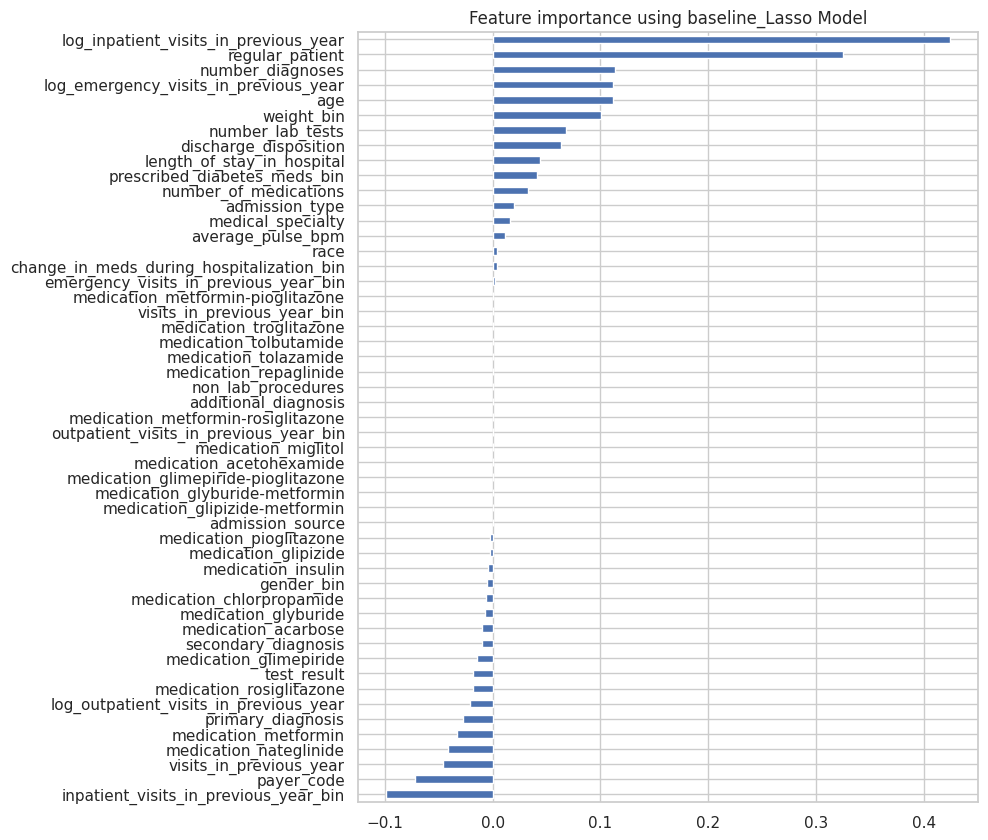

In [107]:
plot_importance(coef,'baseline_Lasso')

## RFE

In [108]:

nof_list=np.arange(15,16) # desde 5 até 51 deu 39 features com .score de 0.655646
high_score=0
# Variable to store the optimum features
nof=0
score_list =[]
for i in range(len(nof_list)):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(model, n_features_to_select=15) # 15 nof_list[i]
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_val_rfe= rfe.transform(X_val)
    model.fit(X_train_rfe,y_resampled)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[i]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=15) # not
X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
model.fit(X_train_rfe,y_resampled)

rfe_selected_features = pd.Series(rfe.support_, index=X_resampled.columns)
print(rfe_selected_features)



Optimum number of features: 15
Score with 15 features: 0.672897
race                                         False
age                                           True
payer_code                                    True
admission_type                               False
medical_specialty                             True
average_pulse_bpm                             True
discharge_disposition                        False
admission_source                             False
length_of_stay_in_hospital                    True
number_lab_tests                              True
non_lab_procedures                            True
number_of_medications                         True
primary_diagnosis                             True
secondary_diagnosis                           True
additional_diagnosis                          True
number_diagnoses                              True
log_outpatient_visits_in_previous_year       False
log_emergency_visits_in_previous_year        False
log_inpatient_visi

In [109]:
rfe_selected_features = rfe_selected_features[rfe_selected_features==True].index.tolist()

## Decision Tree

<Axes: xlabel='Value', ylabel='Col'>

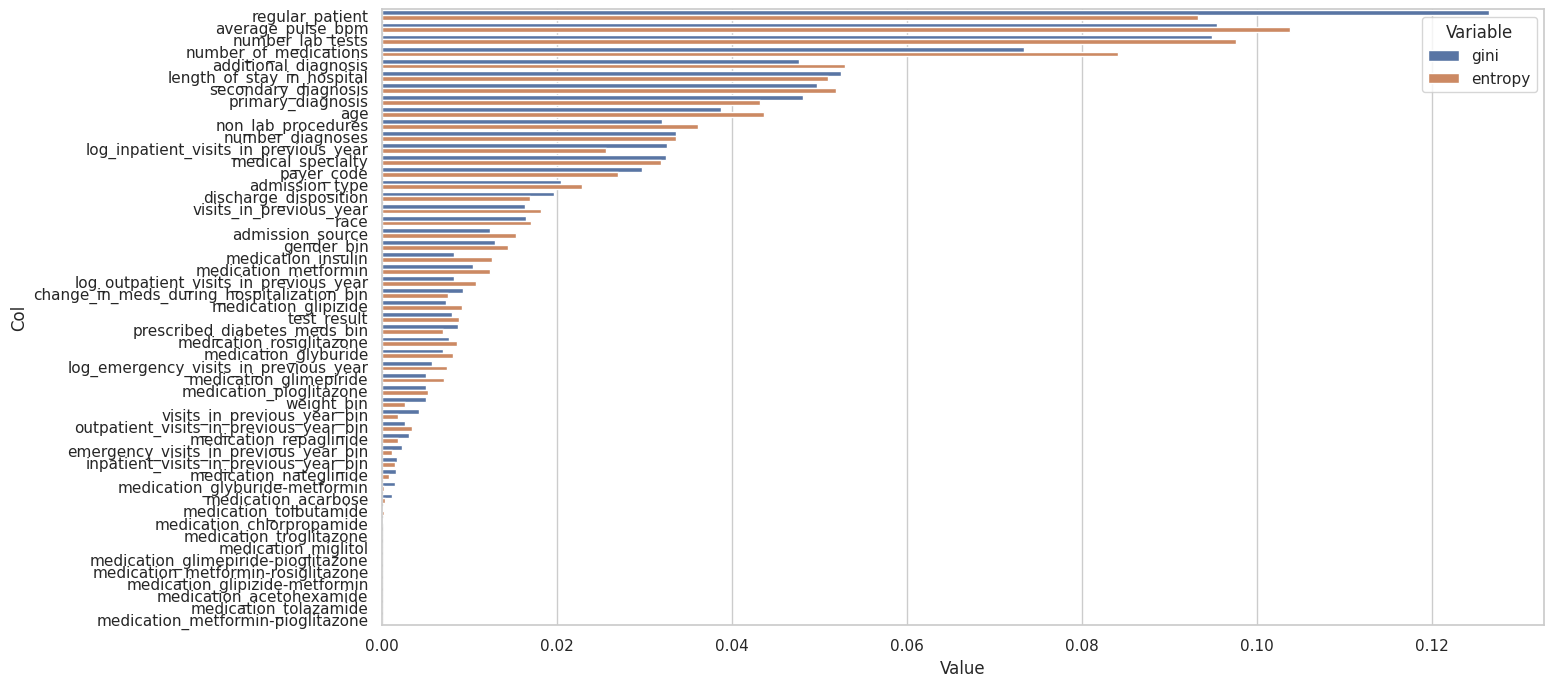

In [110]:
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")

gini_importance = DecisionTreeClassifier().fit(X_resampled, y_resampled).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_resampled, y_resampled).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_resampled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [111]:
# Decidimos criar um threshold de 51 featues sobre 100 ( recomendação do prof )

selected_features_gini = []
selected_features_entropy = []
print("For GINI INDEX")
association_dict = dict(zip(gini_importance, X_train.columns))
for column, value in association_dict.items():
    if column > (100/51)/100:
        print(f"{column}: {value}")
        selected_features_gini.append(value)

print("-----------------------\n")
print("For ENTROPY IMPORTANCE")
association_dict_e = dict(zip(entropy_importance, X_train.columns))
for column, value in association_dict_e.items():
    if column > (100/51)/100:
        print(f"{column}: {value}")
        selected_features_entropy.append(value)

print("-----------------------\n")
print(set(selected_features_gini).intersection(set(selected_features_entropy)))
print(len(set(selected_features_gini).intersection(set(selected_features_entropy))))


For GINI INDEX
0.0388105041905322: age
0.029712409109816606: payer_code
0.020486655096280174: admission_type
0.03245343069541601: medical_specialty
0.0953925630899854: average_pulse_bpm
0.019732764067219046: discharge_disposition
0.05245860930190903: length_of_stay_in_hospital
0.09485183872554032: number_lab_tests
0.03207073815985747: non_lab_procedures
0.07338601822228487: number_of_medications
0.04811937744701089: primary_diagnosis
0.04969190494752389: secondary_diagnosis
0.04762894191569474: additional_diagnosis
0.03358207175819538: number_diagnoses
0.03254893909157751: log_inpatient_visits_in_previous_year
0.12648573204928107: regular_patient
-----------------------

For ENTROPY IMPORTANCE
0.04366300420095929: age
0.02699877733446232: payer_code
0.022839632231335488: admission_type
0.0319026000999939: medical_specialty
0.10378367927272891: average_pulse_bpm
0.05100156726308911: length_of_stay_in_hospital
0.0976002960654669: number_lab_tests
0.03609098665468802: non_lab_procedures
0

In [112]:
dt_selected_features = set(selected_features_gini).intersection(set(selected_features_entropy))

## Forward Selection


In [113]:
import statsmodels.api as smodels

In [114]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = smodels.OLS(target, smodels.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [115]:
#forward_selection(X_resampled, y_resampled)

## Backward Selection

In [116]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = smodels.add_constant(data[features])
        p_values = smodels.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [117]:
#backward_elimination(X_resampled, y_resampled)

## Stepwise Selection

In [118]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = smodels.OLS(target, smodels.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = smodels.add_constant(data[best_features])
                p_values = smodels.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [119]:
#stepwise_selection(X_resampled, y_resampled)

In [120]:
### Best Feature Selectio ( intersection between all methods )

In [121]:
final_features = []

for i in lasso_selected_features:
    #print(i)
    final_features.append(i)
for i in rfe_selected_features:
    #print(i)
    final_features.append(i)
for i in dt_selected_features:
    #print(i)
    final_features.append(i)
for i in stepwise_selection(X_resampled, y_resampled):
    #print(i)
    final_features.append(i)
for i in forward_selection(X_resampled, y_resampled):
    #print(i)
    final_features.append(i)
for i in backward_elimination(X_resampled, y_resampled):
   # print(i)
    final_features.append(i)


In [122]:
from collections import Counter

feature_counts = Counter(final_features)

final_selected_features = [feature for feature, count in feature_counts.items() if count >= 4]

print(final_selected_features)

['age', 'payer_code', 'discharge_disposition', 'length_of_stay_in_hospital', 'number_lab_tests', 'number_diagnoses', 'log_emergency_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'visits_in_previous_year', 'inpatient_visits_in_previous_year_bin', 'medication_metformin', 'weight_bin', 'regular_patient', 'prescribed_diabetes_meds_bin']


In [123]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

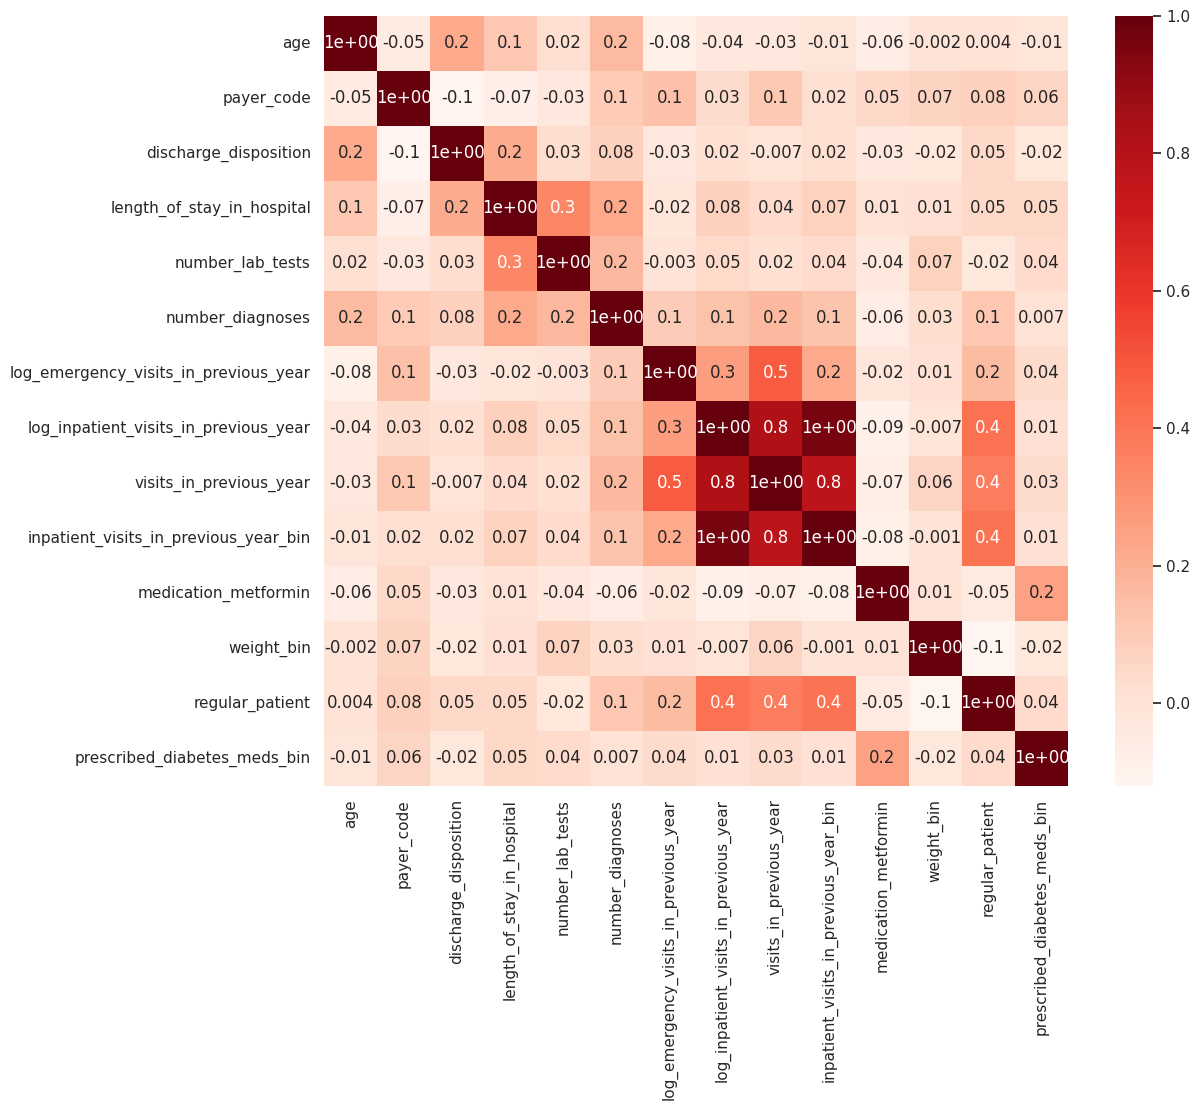

In [124]:
cor_heatmap(X_resampled[final_selected_features].corr(method="spearman"))

In [125]:
# Depois da análise decidimos dropar "inpatient_visits_in_previous_year_bin", já que tem uma correlação mais alta com as outras variáveis
# dq a outra variável em causa "visits_in_previous_year"

final_selected_features.remove("inpatient_visits_in_previous_year_bin")

In [126]:
final_selected_features

['age',
 'payer_code',
 'discharge_disposition',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'number_diagnoses',
 'log_emergency_visits_in_previous_year',
 'log_inpatient_visits_in_previous_year',
 'visits_in_previous_year',
 'medication_metformin',
 'weight_bin',
 'regular_patient',
 'prescribed_diabetes_meds_bin']

## 8. Modeling Selection and Evaluation

> Bloco com avanço



In [129]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

models = ['LogisticReg', 'KNN', 'DecisionTree', 'SVM', 'NaiveBayes', 'BaggingClassifier', 'RandomForest', 'AdaBoost', 'GradBoost',  'MLP']

models_train_score = {}
models_val_score = {}

features_dict = {}

for feat in X_resampled.columns:
  features_dict[feat] = []

for model in models:
  models_train_score[model] = []
  models_val_score[model] = []


for train_index, val_index in skf.split(X_resampled, y_resampled):

  X_train, X_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
  y_train, y_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]


# Logistic Regression
#  logistic_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
#  y_pred = logistic_clf.predict(X_train)
#  models_train_score['LogisticReg'].append(f1_score(y_train, y_pred))

#  y_pred = logistic_clf.predict(X_val)
#  models_val_score['LogisticReg'].append(f1_score(y_val, y_pred))

# Logistic Regression
  logistic_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
  y_prob_train = logistic_clf.predict_proba(X_train)[:, 1]  # Probabilities for class 1
  threshold = 0.4  # Adjust this threshold based on your needs
  y_pred_train = (y_prob_train > threshold).astype(int)
  train_f1 = f1_score(y_train, y_pred_train)
  models_train_score['LogisticReg'].append(train_f1)

  # Evaluate on the validation set
  y_prob_val = logistic_clf.predict_proba(X_val)[:, 1]  # Probabilities for class 1
  y_pred_val = (y_prob_val > threshold).astype(int)
  val_f1 = f1_score(y_val, y_pred_val)
  models_val_score['LogisticReg'].append(val_f1)

  # KNN
  KNN_clf = KNeighborsClassifier().fit(X_train, y_train)
  y_pred = KNN_clf.predict(X_train)
  models_train_score['KNN'].append(f1_score(y_train, y_pred))

  y_pred = KNN_clf.predict(X_val)
  models_val_score['KNN'].append(f1_score(y_val, y_pred))

  # Decision Tree
  tree_clf = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
  y_pred = tree_clf.predict(X_train)
  models_train_score['DecisionTree'].append(f1_score(y_train, y_pred))

  y_pred = tree_clf.predict(X_val)
  models_val_score['DecisionTree'].append(f1_score(y_val, y_pred))

  # SVM
  svm_clf = SVC(random_state = 42).fit(X_train, y_train)
  y_pred = svm_clf.predict(X_train)
  models_train_score['SVM'].append(f1_score(y_train, y_pred))

  y_pred = svm_clf.predict(X_val)
  models_val_score['SVM'].append(f1_score(y_val, y_pred))

  # GaussianNB
  nb_clf = GaussianNB(random_state = 42).fit(X_train, y_train)
  y_pred = nb_clf.predict(X_train)
  models_train_score['NaiveBayes'].append(f1_score(y_train, y_pred))

  y_pred = nb_clf.predict(X_val)
  models_val_score['NaiveBayes'].append(f1_score(y_val, y_pred))

  # BaggingClassifier
  bagging_clf = BaggingClassifier(random_state = 42).fit(X_train, y_train)
  y_pred = bagging_clf.predict(X_train)
  models_train_score['BaggingClassifier'].append(f1_score(y_train, y_pred))

  y_pred = bagging_clf.predict(X_val)
  models_val_score['BaggingClassifier'].append(f1_score(y_val, y_pred))

  # Random Forest -> specific type of bagging
  forest_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
  y_pred = forest_clf.predict(X_train)
  models_train_score['RandomForest'].append(f1_score(y_train, y_pred))

  y_pred = forest_clf.predict(X_val)
  models_val_score['RandomForest'].append(f1_score(y_val, y_pred))

  # Adaptive Boosting with Decision Tree
  adaboost_clf = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)
  y_pred = adaboost_clf.predict(X_train)
  models_train_score['AdaBoost'].append(f1_score(y_train, y_pred))

  y_pred = adaboost_clf.predict(X_val)
  models_val_score['AdaBoost'].append(f1_score(y_val, y_pred))

  # Gradient Boosting
  grad_clf = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)
  y_pred = grad_clf.predict(X_train)
  models_train_score['GradBoost'].append(f1_score(y_train, y_pred))

  y_pred = grad_clf.predict(X_val)
  models_val_score['GradBoost'].append(f1_score(y_val, y_pred))

  # MLP
  mlp_clf = MLPClassifier(hidden_layer_sizes = (100, 100, 100), random_state = 42).fit(X_train, y_train)
  y_pred = mlp_clf.predict(X_train)
  models_train_score['MLP'].append(f1_score(y_train, y_pred))

  y_pred = mlp_clf.predict(X_val)
  models_val_score['MLP'].append(f1_score(y_val, y_pred))

In [130]:
def show_models_results(train_scores, val_scores):
  df = pd.DataFrame(columns = ['Train', 'Val'], index = train_scores.keys())

  for model, scores in train_scores.items():
    df.loc[model, 'Train'] = str(round(np.mean(train_scores[model]),3)) + '+/-' + str(round(np.std(train_scores[model]),2))
    df.loc[model, 'Val'] = str(round(np.mean(val_scores[model]),3)) + '+/-' + str(round(np.std(val_scores[model]),2))

  return df

In [131]:
df = show_models_results(models_train_score, models_val_score)

df

,Train,Val
LogisticReg,0.702+/-0.0,0.7+/-0.01
KNN,0.755+/-0.0,0.637+/-0.01
DecisionTree,1.0+/-0.0,0.591+/-0.01
SVM,0.718+/-0.0,0.712+/-0.01
NaiveBayes,0.254+/-0.16,0.251+/-0.16
QDA,nan+/-nan,nan+/-nan
BaggingClassifier,0.983+/-0.0,0.622+/-0.01
RandomForest,1.0+/-0.0,0.696+/-0.01
AdaBoost,0.688+/-0.0,0.682+/-0.01
GradBoost,0.719+/-0.0,0.71+/-0.01


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_alpha = DecisionTreeClassifier(random_state=42)
path = dt_alpha.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_resampled, y_resampled)
    trees.append(dt_alpha)

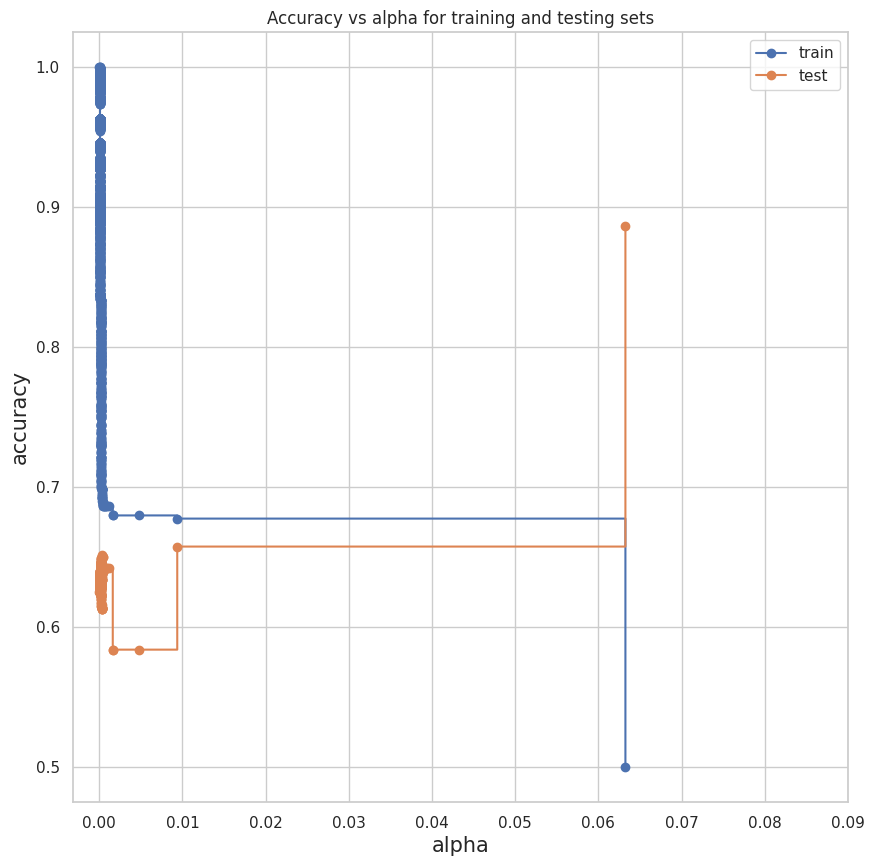

In [ ]:
from sklearn.metrics import f1_score
train_scores = [tree.score(X_resampled, y_resampled) for tree in trees]
test_scores = [tree.score(X_val, y_val) for tree in trees]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel("alpha", fontsize=15)
ax.set_ylabel("accuracy", fontsize=15)
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xticks(np.arange(0,0.1,0.01))
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = trees[index_best_model]
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_resampled, y_resampled))
print('Test accuracy of best model: ',best_model.score(X_val, y_val))

ccp_alpha of best model:  DecisionTreeClassifier(ccp_alpha=0.06324286602464058, random_state=42)
_____________________________________________________________
Training accuracy of best model:  0.5
Test accuracy of best model:  0.8865663123350218


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)
# define your model (any model)
dt_model = DecisionTreeClassifier(ccp_alpha= 0.063,criterion="gini", max_depth=2, min_samples_split=2, min_samples_leaf=4)
# pass your model and KFold object to cross_val_score
# to fit and get the mse of each fold of data

for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(dt_model,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")



accuracy: 0.6042138364779874
recall: 0.4192452830188679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

precision: 0.39938197521349283
f1: 0.408991096556148


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg2 = LogisticRegression()

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)

log_reg2 = LogisticRegression()
for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(log_reg2,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

accuracy: 0.6769182389937105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

recall: 0.7025157232704402


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

precision: 0.668435148046758


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

f1: 0.684963890849167


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)


for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(clf,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.6767295597484276
recall: 0.6966037735849057
precision: 0.6700226098458992
f1: 0.6829746549010822


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=600, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)


for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(clf,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.6767295597484276
recall: 0.6966037735849057
precision: 0.6700226098458992
f1: 0.6829746549010822


In [ ]:
clf.fit(X_resampled, y_resampled)

y_pred_test = clf.predict(test)
sub = pd.Series(y_pred_test, index = test.index)
sub = sub.map({0: 'No', 1: 'Yes'})

sub.columns = ["readmitted_binary"]
sub.to_csv("final_outada.csv")

sub

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Length: 30530, dtype: object

### RandomForest

In [ ]:
# ainda podemos fazer o melhor gráfico para encontrar o melhor alfa

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42,criterion="gini",ccp_alpha=0.015, n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=4)

# Train the model on the training split
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display the scores and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
# Kaggle: 0.31 sem RFE I didnt used grid and with split data at 0.1 test

Accuracy: 0.6565

Confusion Matrix:
[[8037 4291]
 [ 488 1097]]

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.65      0.77     12328
         Yes       0.20      0.69      0.31      1585

    accuracy                           0.66     13913
   macro avg       0.57      0.67      0.54     13913
weighted avg       0.86      0.66      0.72     13913



In [ ]:
y_pred_test = rf_model.predict(test)
sub = pd.DataFrame(y_pred_test, index = test.index)

sub.columns = ["readmitted_binary"]
sub.to_csv("final_out1.csv")

sub

,readmitted_binary
encounter_id,
499502,No
447319,Yes
309126,No
181183,No
359339,No
...,...
451150,No
549298,Yes
327586,No
